# 고양이수염 스티커 만들기 시작!

# 중요 라이브러리 임폴트 하기
이미지 처리를 할 cv2, 이미지를 화면에 띄울 plt, 이미지를 행렬화 할 np, 이미지를 컴퓨터에서 불러올 os 모듈 import

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

# 다운받은 고양이수염 사진 확인하기   
flaticon ( <https://www.flaticon.com/free-icon/cat-whiskers_24674?term=cat%20nose&page=1&position=1> )에서 다운받은 이미지를 로드해서 확인해본다. *512x512* 사이즈이다. `sticker_check`을 그냥 `print()` 했을 때, *255* 원소 값만 확인할 수 있었다. 좀 더 자세히 보기 위해 `np.ravel`함수와 ,`list`의 `tolist()`,`count()`함수로 0과 255 함수 갯수를 세어 보았다. 총 786432 개의 원소 중에 *255* 는 *732756*개 였고, *0*은 *53676*개 인 이미지 였다.

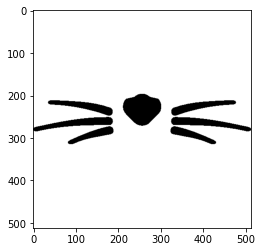

이미지 가로*세로*n차원 :  (512, 512, 3)
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]
전체 원소 갯수 : (786432,)
255 갯수 : 732756
0 갯수 : 53676


In [2]:
# image load
sticker_check_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat.png'
sticker_check = cv2.imread(sticker_check_path)    #- OpenCV로 이미지를 읽어서

# plt.imshow 이미지 출력 
sticker_check = cv2.imread(sticker_check_path)  
sticker_check = cv2.cvtColor(sticker_check, cv2.COLOR_BGR2RGB)
plt.imshow(sticker_check)
plt.show()

#스티커 이미지 사이즈, 원소 값 대략 확인
print('이미지 가로*세로*n차원 : ', sticker_check.shape)
print(sticker_check)

# 1차원 함수로 변환 후 리스트로 변환
sticker_check=np.ravel(sticker_check,order='C')
sticker_check = sticker_check.tolist()

# 리스트 카운트 함수로 원소 값 확인
print('전체 원소 갯수 :', np.shape(sticker_check))
print('255 갯수 :', sticker_check.count(255))
print('0 갯수 :', sticker_check.count(0))

# 얼굴 사진 확인하기
스마트폰으로 16:9 비율로 내 얼굴을 찍은 사진으로 테스트 했다. openCV 라이브러리는 BGR을 사용하기 때문에 RGB로 바꿔주었다.

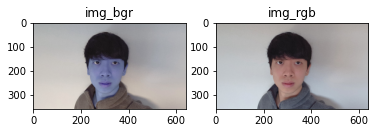

In [3]:
fig = plt.figure()
rows =1
cols =2

my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/image.jpg'
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
img_bgr = cv2.resize(img_bgr, (640, 360))    # 640x360의 크기로 Resize
img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관
img_show_1 = img_bgr.copy() 
img_show_2 = img_bgr.copy() 
img_show_3 = img_bgr.copy()
img_show_4 = img_bgr.copy()
img_show_5 = img_bgr.copy()
img_show_6 = img_bgr.copy()
# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지말기
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)


ax1 = fig.add_subplot(rows, cols, 1)
ax1.imshow(img_bgr)
ax1.set_title('img_bgr')

ax2 = fig.add_subplot(rows, cols, 2)
ax2.imshow(img_rgb)
ax2.set_title('img_rgb')

plt.show()

# 얼굴 사각형 잡기
dlib을 import한다. dlib라이브러리에서 제공하는 face detector의 HOG(Histogram of Oriented Gradient) feature를 사용해서 원본이미지에서 얼굴을 찾는다. test_dataset인 얼굴 사진을 넣어주면 되는 것이다. 그리고 네모박스로 사각형을 잡아준다. 네모박스는 정사각형 이다.

rectangles[[(236, 133) (390, 288)]]


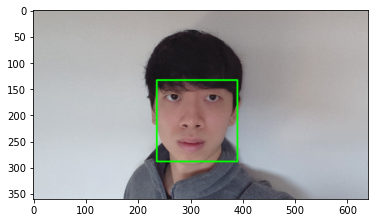

In [4]:
import dlib

detector_hog = dlib.get_frontal_face_detector()   #- detector 선언
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)
print(dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

# 다운받은 Dlib에서 제공하는 랜드마크 모델 불러오기
다운로드 주소 : $ wget http://dlib.net/files   
Dlib은 ibug 300-W 데이터셋으로 학습된 모델을 제공해준다. 

In [5]:
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

# 랜드마크를 리스트에 저장하기
아까 만든 네모박스를 토대로 랜드마크 위치를 맵핑한다. 랜드마크 갯수는 *68*개 이다.

In [6]:
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


# 랜드마크의 위치 확인하기
*68*개의 이목구비 위치는 다음과 같다.
`plt.figure(figsize=(x,y))`으로 이미지를 확대하여 확인했다. 

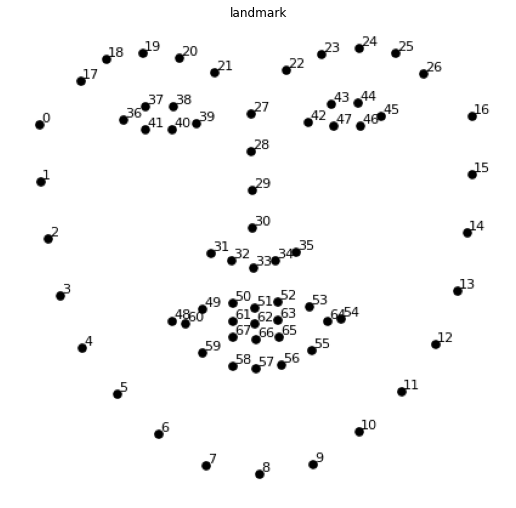

In [7]:
landmark_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/landmark.png'
img_landmark_bgr = cv2.imread(landmark_path)

lm_fig = plt.figure(figsize=(9,9))
lm_ax = lm_fig.add_subplot(1, 1, 1)
lm_ax.imshow(img_landmark_bgr)
lm_ax.set_title('landmark')
plt.axis("off")
plt.show()

# 랜드마크를 내 얼굴에 출력하기
얼굴 사진에 네모박스와 노란점 랜드마크를 출력해주어, 이미지를 잘 인식했는지 확인한다.

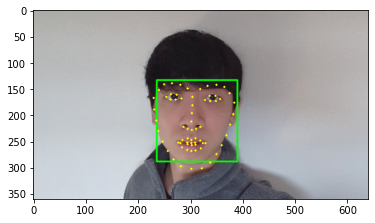

In [8]:
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

# 스티커 적용 위치 찾기
코의 중심 점인 `landmark[30]`위주로 수염이미지의 중심을 맞추면 된다고 생각해서 `landmark[30]` 점의 좌표값만 이용해서 고양이 수염의 위치를 잡았다. 이미지는 왼쪽 상단(*left_top*)에서부터 시작하기 때문에 코의 중심점에 스티커 중심을 맞추려면 네모박스의 절반 길이만큼 가감해야 한다. 스티커의 크기는 네모박스 크기와 맞추었다. 코의 중심점 좌표는 `(302, 212)` 였다. 스티커 왼쪽 상단 좌표는 `(225, 135)`로, 네모박스의 절반 크기인 `77`이 잘 가감되었음을 확인했다.

In [9]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print ('코의 중심점 = ',landmark[30]) # nose center index : 30
    x = landmark[30][0] - dlib_rect.width()//2
    y = landmark[30][1] - dlib_rect.width()//2 #중심을 맞추기 위한 가감
    w = dlib_rect.width()
    h = dlib_rect.width()
    print ('스티커 왼쪽 상단 좌표 =(x,y) : (%d,%d)'%(x,y))
    print ('스티커 크기 =(w,h) : (%d,%d)'%(w,h))

코의 중심점 =  (302, 212)
스티커 왼쪽 상단 좌표 =(x,y) : (225,135)
스티커 크기 =(w,h) : (155,155)


# 준비해 둔 스티커 이미지를 읽어서 resize 하기 
resize sticker shape : 는 155,155로, 네모박스 사이즈에 맞게 고양이 수염도 resize 되었다.

In [10]:
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
print ("resize sticker shape : ",img_sticker.shape)

resize sticker shape :  (155, 155, 3)


# 원본 이미지에 스티커 이미지를 추가하기위해 x,y 좌표 조정하기

### 문제점
1. 고양이 수염의 위치가 안움직임   
기존 코드에서 수염을 움직이기 위해 `refined_y` 변수에 특정 값을 더하거나 곱하거나 특정 상수로 초기화 해줘도 왕관의 위치가 변하지 않았다. 수염이 계속 왕관의 위치에 있었다.
---
2. 고양이 수염의 배경만 흰색으로 출력됨   
고양이 수염의 배경은 날리고 고양이 수염은 검은색으로 출력되야하는데 배경만 흰색으로 출력되었다. 

### 기존코드

1 (x,y) : (225,-20)
(135, 155, 3)
2 (x,y) : (225,0)


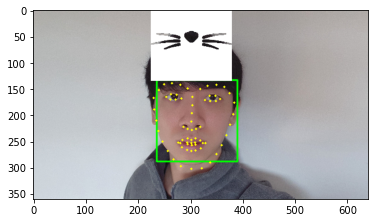

In [11]:
refined_x = x  
refined_y = y - h      # top
print ("1",'(x,y) : (%d,%d)'%(refined_x, refined_y))

img_sticker = img_sticker[-refined_y:]
print (img_sticker.shape)
refined_y = 0
print ("2",'(x,y) : (%d,%d)'%(refined_x, refined_y))

sticker_area = img_show[refined_y:img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)


plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

# 원본 이미지에 스티커 이미지를 추가하기 위해 x,y 좌표 조정하기

### 문제점 해결
1. 수염의 위치가 안움직임   
먼저, `refined_y = 0` 이 변수 초기화 코드는 왕관 위치 잡을때만 필요한 코드라고 생각되어 일단 조금이라도 움직여보려고 특정 상수를 입력 해줬다. 그런데 `refined_y = 0` 코드가 없으면 다음과 같은 오류가 생겼다.
```
ValueError: operands could not be broadcast together with shapes (113,130,3) (63,130,3) (113,130,3)
```   
그래서 이 부분은 놔두고 `refined_y = y - h` 를 `refined_y = y + h + h` 로 변경하였다. 하지만 아무 변화가 없었다.   
그런데 `x` 에 변화를 주면 `x` 좌표는 움직였다. 왜 `x`는 움직이고 `y`는 움직이지 않을까 유심히 살펴본 결과 `sticker_area`와 `img_show[]`를 슬라이싱 하는 과정에서 `x`좌표 부분은`refined_x:refined_x+img_sticker.shape[1]`인데  `y`좌표 부분은 `refined_y:img_sticker.shape[0]`로 다르다는 것을 확인할 수 있었다. `x`좌표는 슬라이싱 범위가 바뀌는 값이 + 되어 적용되도록 코드가 짜여져 있는데 `y`좌표는 슬라이싱 부분에 + 가 없었다. 그래서 `y`좌표 슬라이싱 부분로 `x`좌표 슬라이싱 처럼 `refined_y:refined_y+=img_sticker.shape[0]` 로 바꿔주었다만 그 후에 적정 y값을 찾다가 140이라는 상수 값을 넣었을 때 적당하다는 위치라는 것을 확인했다.


2. 고양이 수염의 배경만 흰색으로 출력됨   
아까 위에서 스티커 이미지 값을 확인했을 때 *255* 또는 *0* 이 두개 값으로만 이루어져 있었기 때문에, `np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)` 코드에서 *0*대신 *255*를 넣어보았다. 수염 색이 잘 나타났다.

1 (x,y) : (225,445)
(135, 155, 3)
2 (x,y) : (225,0)


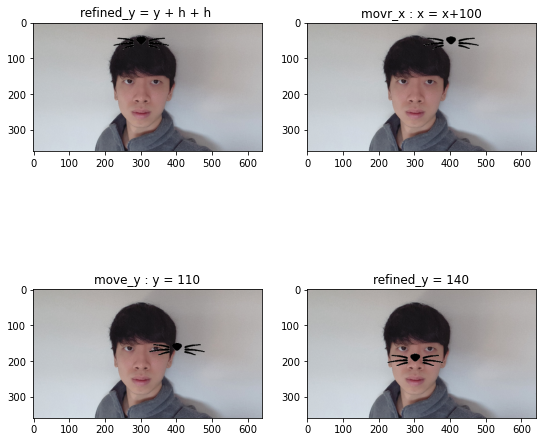

In [12]:
refined_x = x  
refined_y = y + h + h     # top

print ("1",'(x,y) : (%d,%d)'%(refined_x, refined_y))



img_sticker = img_sticker[-refined_y:]
print (img_sticker.shape)
refined_y = 0 
print ("2",'(x,y) : (%d,%d)'%(refined_x, refined_y))

sticker_area = img_show_1[refined_y:img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show_1[refined_y:img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)


t_fig = plt.figure(figsize=(9,9))
rows = 2
cols = 2

t_ax1 = t_fig.add_subplot(rows, cols, 1)
t_ax1.imshow(cv2.cvtColor(img_show_1, cv2.COLOR_BGR2RGB))
t_ax1.set_title('refined_y = y + h + h ')

refined_x = x + 100

sticker_area = img_show_2[refined_y:img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show_2[refined_y:img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

t_ax2 = t_fig.add_subplot(rows, cols, 2)
t_ax2.imshow(cv2.cvtColor(img_show_2, cv2.COLOR_BGR2RGB))
t_ax2.set_title('movr_x : x = x+100')

refined_y = 110

new_sticker_area = img_show_3[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show_3[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,new_sticker_area,img_sticker).astype(np.uint8)

t_ax3 = t_fig.add_subplot(rows, cols, 3)
t_ax3.imshow(cv2.cvtColor(img_show_3, cv2.COLOR_BGR2RGB))
t_ax3.set_title('move_y : y = 110')

refined_y = 140
refined_x = x

new_sticker_area = img_show_4[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show_4[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,new_sticker_area,img_sticker).astype(np.uint8)

t_ax4 = t_fig.add_subplot(rows, cols, 4)
t_ax4.imshow(cv2.cvtColor(img_show_4, cv2.COLOR_BGR2RGB))
t_ax4.set_title('refined_y = 140')

plt.show()

# 다른 이미지에도 적용해보기_1   
`refined_y = 140` 이라는 고정 상수 값으로 다른 이미지에 적용했을 때 어떻게 되는지 확인해 보었다. 연예인 사진을 활용했다.

rectangles[[(239, 96) (368, 225)]]
(306, 164)
(x,y) : (306,99)
(w,h) : (130,130)
1 (x,y) : (241,229)
(130, 130, 3)
2 (x,y) : (241,140)


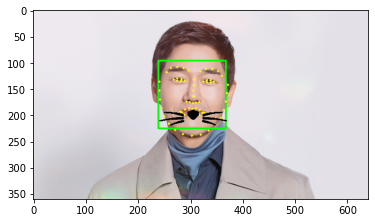

In [13]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib
import os

my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/han.jpeg'
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
img_bgr = cv2.resize(img_bgr, (640, 360))    # 640x360의 크기로 Resize
img_show = img_bgr.copy() 
img_show_1 = img_bgr.copy()      #- 출력용 이미지 별도 보관
img_show_2 = img_bgr.copy()
img_show_3 = img_bgr.copy()
img_show_4 = img_bgr.copy()

# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요. 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

detector_hog = dlib.get_frontal_face_detector()   #- detector 선언
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)
print(dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)


model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)


list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)


for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)


for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # nose center index : 30
    x = landmark[30][0]
    y = landmark[30][1] - dlib_rect.width()//2
    w = dlib_rect.width()
    h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))
    
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))

refined_x = x - w // 2  # left
refined_y = y + h      # top
print ("1",'(x,y) : (%d,%d)'%(refined_x, refined_y))

img_sticker = img_sticker[-refined_y:]
print (img_sticker.shape)
refined_y = 140
print ("2",'(x,y) : (%d,%d)'%(refined_x, refined_y))

sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()


# 다른 이미지에도 적용해보기_1    
### 문제점
1. 고정된 고양이 수염의 위치는 범용성이 없음      
`refined_y = 140` 이 값은 특정 사진에서만 적용 되는 값이기 때문에 다른 사진에 적용하였을 경우 수염이 엉뚱한 곳에 붙었다. 사진마다 네모박스의 사이즈와 위치가 다르기 때문에 이렇게 고정된 상수 값을 입력하면 안된다.

### 문제점 해결
1. `refined_y` 값을 네모박스 비율에 대한 값으로 변경      
네모박스 크기와 위치에 따라 수염의 위치가 달라져야 하기 때문에 네모박스 비율에 대한 변수를 `refined_y`에 넣기로 했다. `y`에 `h`를 3,6,9,13으로 나눈 값을 각각 적용하여 적절한 위치를 찾았다. `refined_y = y + h//9` , `(x,y) : (241,113)` 가 가장 적절한 값인 것을 확인했다.

refined_y = y + h//3 :  (x,y) : (241,142)
refined_y = y + h//6 :  (x,y) : (241,120)
refined_y = y + h//9 :  (x,y) : (241,113)
refined_y = y + h//13 :  (x,y) : (241,109)


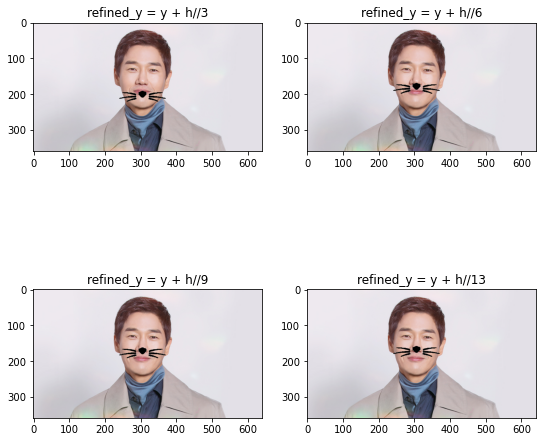

In [14]:
refined_x = x - w // 2  # left

refined_y = y + h//3

print ("refined_y = y + h//3 : ",'(x,y) : (%d,%d)'%(refined_x, refined_y))

img_sticker = img_sticker[-refined_y:]

sticker_area = img_show_1[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show_1[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

t_fig = plt.figure(figsize=(9,9))
rows = 2
cols = 2

t_ax1 = t_fig.add_subplot(rows, cols, 1)
t_ax1.imshow(cv2.cvtColor(img_show_1, cv2.COLOR_BGR2RGB))
t_ax1.set_title('refined_y = y + h//3')

refined_y = y + h//6
print ("refined_y = y + h//6 : ",'(x,y) : (%d,%d)'%(refined_x, refined_y))

sticker_area = img_show_2[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show_2[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

t_ax2 = t_fig.add_subplot(rows, cols, 2)
t_ax2.imshow(cv2.cvtColor(img_show_2, cv2.COLOR_BGR2RGB))
t_ax2.set_title('refined_y = y + h//6')

refined_y = y + h//9
print ("refined_y = y + h//9 : ",'(x,y) : (%d,%d)'%(refined_x, refined_y))

new_sticker_area = img_show_3[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show_3[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,new_sticker_area,img_sticker).astype(np.uint8)

t_ax3 = t_fig.add_subplot(rows, cols, 3)
t_ax3.imshow(cv2.cvtColor(img_show_3, cv2.COLOR_BGR2RGB))
t_ax3.set_title('refined_y = y + h//9')

refined_y = y + h//13
print ("refined_y = y + h//13 : ",'(x,y) : (%d,%d)'%(refined_x, refined_y))

new_sticker_area = img_show_4[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show_4[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,new_sticker_area,img_sticker).astype(np.uint8)

t_ax4 = t_fig.add_subplot(rows, cols, 4)
t_ax4.imshow(cv2.cvtColor(img_show_4, cv2.COLOR_BGR2RGB))
t_ax4.set_title('refined_y = y + h//13')

plt.show()

# 다른 이미지에도 적용해보기_2

멀리서 찍은 사진, 아래에서 찍은 사진, 옆에서 찍은 사진에도 적용해 보았다.

## 멀리서 찍은 사진

rectangles[[(254, 221) (328, 296)]]
(296, 253)
(x,y) : (296,216)
(w,h) : (75,75)
1 (x,y) : (259,224)
(75, 75, 3)
2 (x,y) : (259,224)


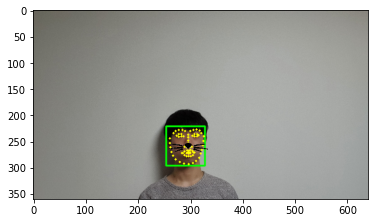

In [15]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib
import os

my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/far_image.jpg'
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
img_bgr = cv2.resize(img_bgr, (640, 360))    # 640x360의 크기로 Resize
img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관

# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요. 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

detector_hog = dlib.get_frontal_face_detector()   #- detector 선언
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)
print(dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)


model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)


list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)


for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)


for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # nose center index : 30
    x = landmark[30][0]
    y = landmark[30][1] - dlib_rect.width()//2
    w = dlib_rect.width()
    h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))
    
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))

refined_x = x - w // 2  # left
refined_y = y + h//9      # top
print ("1",'(x,y) : (%d,%d)'%(refined_x, refined_y))

img_sticker = img_sticker[-refined_y:]
print (img_sticker.shape)
#refined_y = refined_y//2
print ("2",'(x,y) : (%d,%d)'%(refined_x, refined_y))

sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

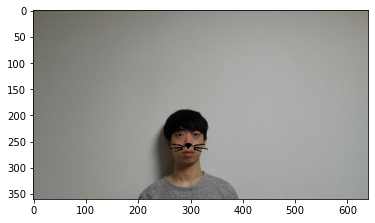

In [16]:
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

## 옆에서 찍은 사진

rectangles[[(221, 98) (407, 284)]]
(321, 198)
(x,y) : (321,105)
(w,h) : (187,187)
1 (x,y) : (228,125)
(125, 187, 3)
2 (x,y) : (228,125)


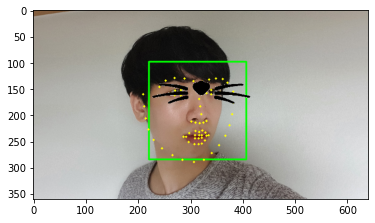

In [17]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib
import os

my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/side_image.jpg'
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
img_bgr = cv2.resize(img_bgr, (640, 360))    # 640x360의 크기로 Resize
img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관

# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요. 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

detector_hog = dlib.get_frontal_face_detector()   #- detector 선언
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)
print(dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)


model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)


list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)


for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)


for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # nose center index : 30
    x = landmark[30][0]
    y = landmark[30][1] - dlib_rect.width()//2
    w = dlib_rect.width()
    h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))
    
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))

refined_x = x - w // 2  # left
refined_y = y +h//9      # top
print ("1",'(x,y) : (%d,%d)'%(refined_x, refined_y))

img_sticker = img_sticker[-refined_y:]
print (img_sticker.shape)
#refined_y = refined_y//2
print ("2",'(x,y) : (%d,%d)'%(refined_x, refined_y))

sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

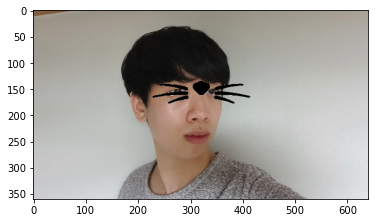

In [18]:
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

## 아래에서 찍은 사진

rectangles[[(253, 182) (382, 311)]]
(321, 225)
(x,y) : (321,160)
(w,h) : (130,130)
1 (x,y) : (256,174)
(130, 130, 3)
2 (x,y) : (256,174)


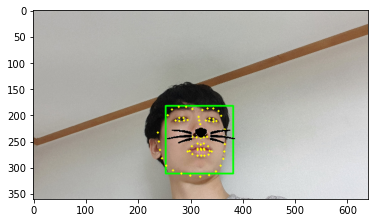

In [19]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/under_image.jpg'
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
img_bgr = cv2.resize(img_bgr, (640, 360))    # 640x360의 크기로 Resize
img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관

# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요. 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

detector_hog = dlib.get_frontal_face_detector()   #- detector 선언
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)
print(dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)


model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)


list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)


for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)


for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # nose center index : 30
    x = landmark[30][0]
    y = landmark[30][1] - dlib_rect.width()//2
    w = dlib_rect.width()
    h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))
    
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))

refined_x = x - w // 2  # left
refined_y = y + h//9      # top
print ("1",'(x,y) : (%d,%d)'%(refined_x, refined_y))

img_sticker = img_sticker[-refined_y:]
print (img_sticker.shape)
#refined_y = refined_y//2
print ("2",'(x,y) : (%d,%d)'%(refined_x, refined_y))

sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

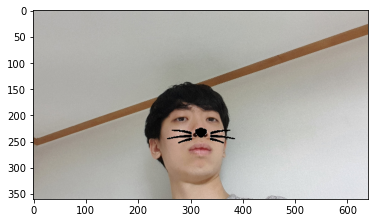

In [20]:
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

# 다른 이미지에도 적용해보기_2   

### 문제점   
다른이미지는 잘 붙었는데 옆에서 찍은 이미지는 잘 붙지 않았다. 원인을 확인하기 위해 `np.where(img_sticker==0 ...`을 하여 고양이 수염 배경을 흰색으로 출력해 보았다.


rectangles[[(221, 98) (407, 284)]]
(321, 198)
(x,y) : (321,105)
(w,h) : (187,187)
1 (x,y) : (228,125)
(125, 187, 3)
2 (x,y) : (228,125)


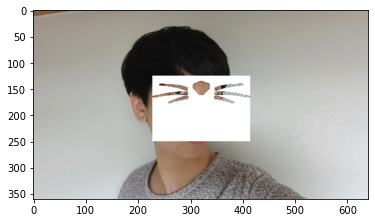

In [21]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/side_image.jpg'
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
img_bgr = cv2.resize(img_bgr, (640, 360))    # 640x360의 크기로 Resize
img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관

# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요. 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

detector_hog = dlib.get_frontal_face_detector()   #- detector 선언
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)
print(dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)


model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)


list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)


for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)


for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # nose center index : 30
    x = landmark[30][0]
    y = landmark[30][1] - dlib_rect.width()//2
    w = dlib_rect.width()
    h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))
    
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))

refined_x = x - w // 2  # left
refined_y = y +h//9      # top
print ("1",'(x,y) : (%d,%d)'%(refined_x, refined_y))

img_sticker = img_sticker[-refined_y:]
print (img_sticker.shape)
#refined_y = refined_y//2
print ("2",'(x,y) : (%d,%d)'%(refined_x, refined_y))

sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()



# 다른 이미지에도 적용해보기_2

### 문제점 해결 
고양이 수염을 확인해보니, 스티커 이미지가 잘린것을 확인했다. 이미지가 잘려서 좌표를 잘 잡지 못하여 이미지가 밀린 것이였다. 잘린 원인은 노드에서 왕관을 자르기 위해 사용한`img_sticker = img_sticker[-refined_y:]` 코드 때문이었다. 왕관은 머리에 씌우는 스티커라서 사진 밖을 삐져나올 경우를 대비해 `-y` 값을 해준 것인데, 고양이 수염은 그럴 일이 없어서 필요없는 코드였다. 그래서 이 부분을 주석처리 해주었다. 아래와 같이 잘 적용되었다.

rectangles[[(221, 98) (407, 284)]]
(321, 198)
(x,y) : (321,105)
(w,h) : (187,187)
1 (x,y) : (228,125)
(187, 187, 3)
2 (x,y) : (228,125)


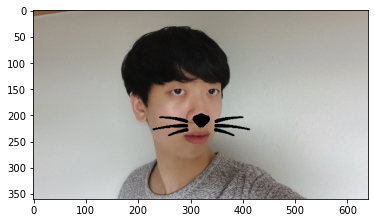

In [22]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/side_image.jpg'
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
img_bgr = cv2.resize(img_bgr, (640, 360))    # 640x360의 크기로 Resize
img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관

# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요. 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

detector_hog = dlib.get_frontal_face_detector()   #- detector 선언
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)
print(dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)


model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)


list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)


for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)


for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # nose center index : 30
    x = landmark[30][0]
    y = landmark[30][1] - dlib_rect.width()//2
    w = dlib_rect.width()
    h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))
    
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))

refined_x = x - w // 2  # left
refined_y = y +h//9      # top
print ("1",'(x,y) : (%d,%d)'%(refined_x, refined_y))
#img_sticker = img_sticker[-refined_y:]
print (img_sticker.shape)
#refined_y = refined_y//2
print ("2",'(x,y) : (%d,%d)'%(refined_x, refined_y))

sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

# 다른 이미지에도 적용해보기_3
이번엔 어두운 사진에도 적용해보았다. 어두운 사진에도 잘 적용되었다.


rectangles[[(110, 96) (239, 225)]]
(171, 166)
(x,y) : (171,101)
(w,h) : (130,130)
1 (x,y) : (106,115)
(130, 130, 3)
2 (x,y) : (106,115)


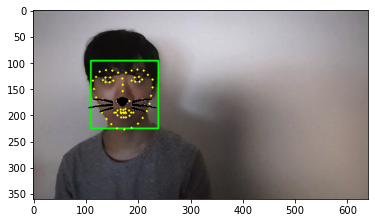

In [23]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/dark_image.jpg'
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
img_bgr = cv2.resize(img_bgr, (640, 360))    # 640x360의 크기로 Resize
img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관

# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요. 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

detector_hog = dlib.get_frontal_face_detector()   #- detector 선언
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)
print(dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)


model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)


list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)


for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)


for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # nose center index : 30
    x = landmark[30][0]
    y = landmark[30][1] - dlib_rect.width()//2
    w = dlib_rect.width()
    h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))
    
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))

refined_x = x - w // 2  # left
refined_y = y +h//9      # top
print ("1",'(x,y) : (%d,%d)'%(refined_x, refined_y))

#img_sticker = img_sticker[-refined_y:]
print (img_sticker.shape)
#refined_y = refined_y//2
print ("2",'(x,y) : (%d,%d)'%(refined_x, refined_y))

sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

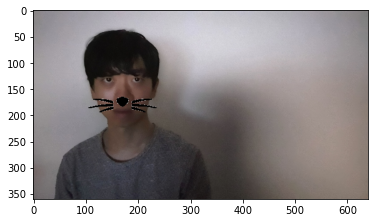

In [24]:
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

# 수염 투명하게 해보기
수염을 조금 자연스럽게 붙이기 위해 `cv2.addWeighted` 를 이용하여 투명하게 붙여보았다. 이미지 원본과 수염붙인 이미지의 가중치를 조절하여 함수를 적용했다.

rectangles[[(236, 133) (390, 288)]]
(302, 212)
(x,y) : (302,135)
(w,h) : (155,155)
1 (x,y) : (225,152)
(155, 155, 3)
2 (x,y) : (225,152)


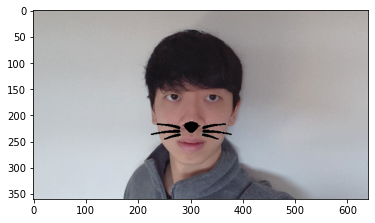

In [25]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/image.jpg'
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
img_bgr = cv2.resize(img_bgr, (640, 360))    # 640x360의 크기로 Resize
img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관

# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요. 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

detector_hog = dlib.get_frontal_face_detector()   #- detector 선언
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)
print(dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)


model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)


list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)


for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)


for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # nose center index : 30
    x = landmark[30][0]
    y = landmark[30][1] - dlib_rect.width()//2
    w = dlib_rect.width()
    h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))
    
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))

refined_x = x - w // 2  # left
refined_y = y +h//9      # top
print ("1",'(x,y) : (%d,%d)'%(refined_x, refined_y))

#img_sticker = img_sticker[-refined_y:]
print (img_sticker.shape)
#refined_y = refined_y//2
print ("2",'(x,y) : (%d,%d)'%(refined_x, refined_y))

sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

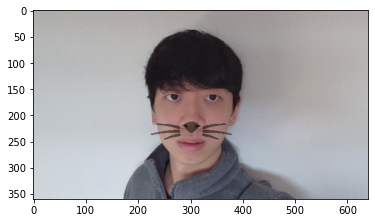

In [26]:
img_one = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
img_one = cv2.resize(img_one, (640, 360))    # 640x360의 크기로 Resizecv2.cvtColor(, cv2.COLOR_BGR2RGB))
dst = cv2.addWeighted(img_one, 0.5, img_bgr, 0.5, 0)
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.show()

# 이미지 밝기 조절해보기   
`cv2.addWeighted` 함수를 써서 이미지 가중치를 조절하다보면, 가중치의 합이 1.0 초과 일 때 이미지가 밝아지는것을 확인할 수 잇었다. 어두운 이미지가 인식이 잘됐지만 만약 어두운 이미지가 인식이 안된다면, `if`문과 다음과 같은 함수로 이미지를 밝게 조절하여 인식하는 방법을 하면 될 것 같다.

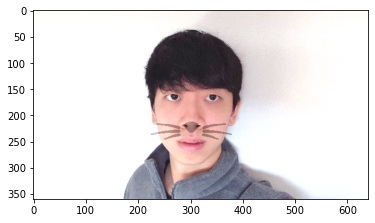

In [27]:
img_one = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
img_one = cv2.resize(img_one, (640, 360))    # 640x360의 크기로 Resizecv2.cvtColor(, cv2.COLOR_BGR2RGB))
dst = cv2.addWeighted(img_one, 1.0, img_bgr, 0.5, 0)
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.show()

# 마치며 ...
## 루브릭 평가문항
1. 자기만의 카메라앱 기능 구현을 완수하였다. 원본에 스티커 사진이 정상적으로 합성되었다.
     - 처음에 수염이 안움직였는데 슬라이싱 부분을 새롭게 고쳐서 나만의 기능을 구현했다. 그        리고 스티커가 잘 합성되었다. `refined_y =0` 인 부분도 비율에 따라 적용되도록 수정했다. 그리고 스티커가 잘리지 않도록 `img_sticker = img_sticker[-refined_y:]` 을 주석 처리했다. 또한 자연스러운 스티커를 적용시키기 위해 `cv2.addWeighted` 함수를 써서 투명도를 조절하였다.
--- 
2. 스티커 이미지를 정확한 원본 위치에 반영하였다. 정확한 좌표계산을 통해 고양이 수염의 위치가 원본 얼굴에 잘 어울리게 출력되었다.
    - 코 중심 좌표와 이미지 스티커 시작 좌표를 출력하여 확인하며 수염을 붙였다. 또한 네모박스 비율에 대한 적절한 값을 찾을 때 `refined_y = y +h//9, (x,y) : (241,113)` 좌표 계산하여 위치를 찾았다.  
---
3. 카메라 스티커앱을 다양한 원본이미지에 적용했을 때의 문제점을 체계적으로 분석하였다. 얼굴각도, 이미지 밝기, 촬영거리 등 다양한 변수에 따른 영향도를 보고서에 체계적으로 분석하였다.
    - 각도를 달리했을때 `img_sticker = img_sticker[-refined_y:]` 코드의 문제를 찾고 주석처리하였다. 어두운 이미지가 인식이 안될 때 대비책을 고안해 두었다.